In [49]:
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(reshape2)
library(corrplot)

In [3]:
df <- read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
head(df,10)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8
0,1,0,1,30,1,0,0,0,0,⋯,1,0,3,0,14,0,0,9,6,7
0,1,1,1,25,1,0,0,1,0,⋯,1,0,3,0,0,1,0,11,4,4
2,1,1,1,30,1,0,1,0,1,⋯,1,0,5,30,30,1,0,9,5,1


In [4]:
str(df)

spc_tbl_ [253,680 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Diabetes_012        : num [1:253680] 0 0 0 0 0 0 0 0 2 0 ...
 $ HighBP              : num [1:253680] 1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : num [1:253680] 1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : num [1:253680] 1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num [1:253680] 40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : num [1:253680] 1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : num [1:253680] 0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num [1:253680] 0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : num [1:253680] 0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : num [1:253680] 0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : num [1:253680] 1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : num [1:253680] 0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : num [1:253680] 1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : num [1:253680] 0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : num [

In [50]:
# check for missing values
sum(is.na(df))

[1] 0

dữ liệu không có NaN

In [7]:
# Check for duplicated rows
sum(duplicated(df))

[1] 23899

dữ liệu có ~24000 dòng bị trùng nhau, chiếm khoảng 9.5% dữ liệu gốc     
tuy nhiên dữ liệu không có id cho mỗi observation nên có thể xem mỗi observation là 1 cá thể riêng biệt và có thể có dữ liệu về tình trạng sức khỏe giống nhau. => có thể không cần thực hiện xóa dữ liệu trùng lặp

In [9]:
# Count unique values in each column
print(sapply(df, n_distinct))

        Diabetes_012               HighBP             HighChol 
                   3                    2                    2 
           CholCheck                  BMI               Smoker 
                   2                   84                    2 
              Stroke HeartDiseaseorAttack         PhysActivity 
                   2                    2                    2 
              Fruits              Veggies    HvyAlcoholConsump 
                   2                    2                    2 
       AnyHealthcare          NoDocbcCost              GenHlth 
                   2                    2                    5 
            MentHlth             PhysHlth             DiffWalk 
                  31                   31                    2 
                 Sex                  Age            Education 
                   2                   13                    6 
              Income 
                   8 


hầu hết các biến trong dataset là biến nhị phân -> biến định tính       
các biến định tính không phải nhị phân bao gồm: Diabetes_012, GenHlth, Age, Education, Income       
các biến định lượng:  
- rời rạc: MentHlth, PhysHlth
- liên tục: BMI (trong dataset này thì được biểu diễn rời rạc)

### Biến định lượng

vẽ biểu đồ cho biến định lượng:

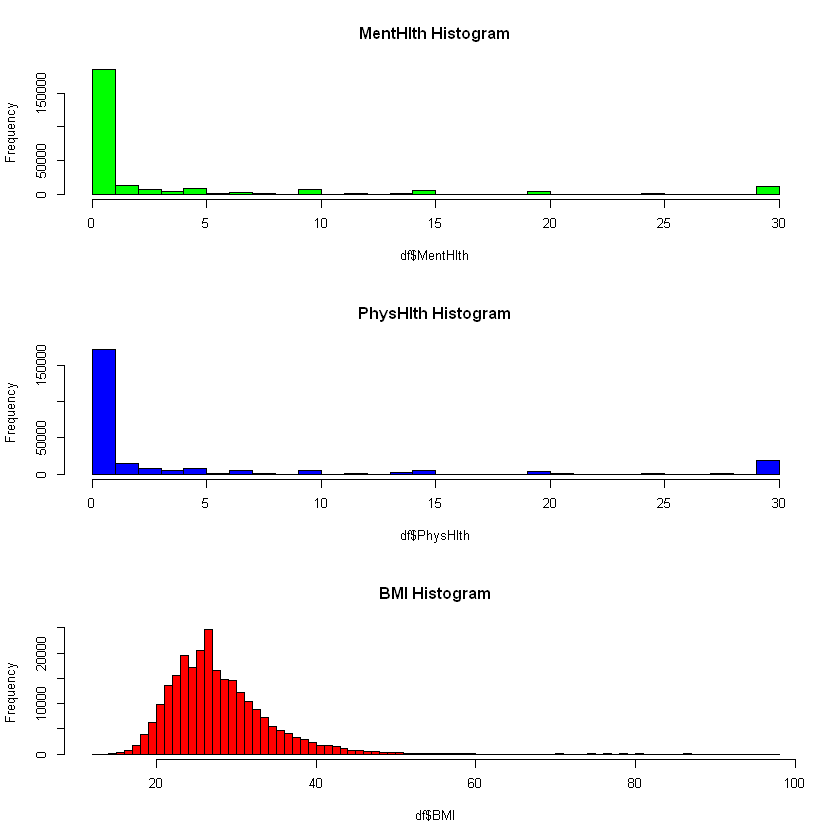

In [11]:
# Plot histograms for quantitative variables
par(mfrow=c(3,1), bg='white')
hist(df$MentHlth, breaks=31, col='green', main='MentHlth Histogram')
hist(df$PhysHlth, breaks=31, col='blue', main='PhysHlth Histogram')
hist(df$BMI, breaks=84, col='red', main='BMI Histogram')

MentHlth và PhysHlth chứa nhiều giá trị 0: phần lớn mọi người không có vấn đề về sức khỏe tinh thần và thể chất. Điều này cũng khá phù hợp với thực tế       
Histogram cho 2 biến này đương tối tương đồng -> có thể có đa cộng tuyến giữa 2 biến này


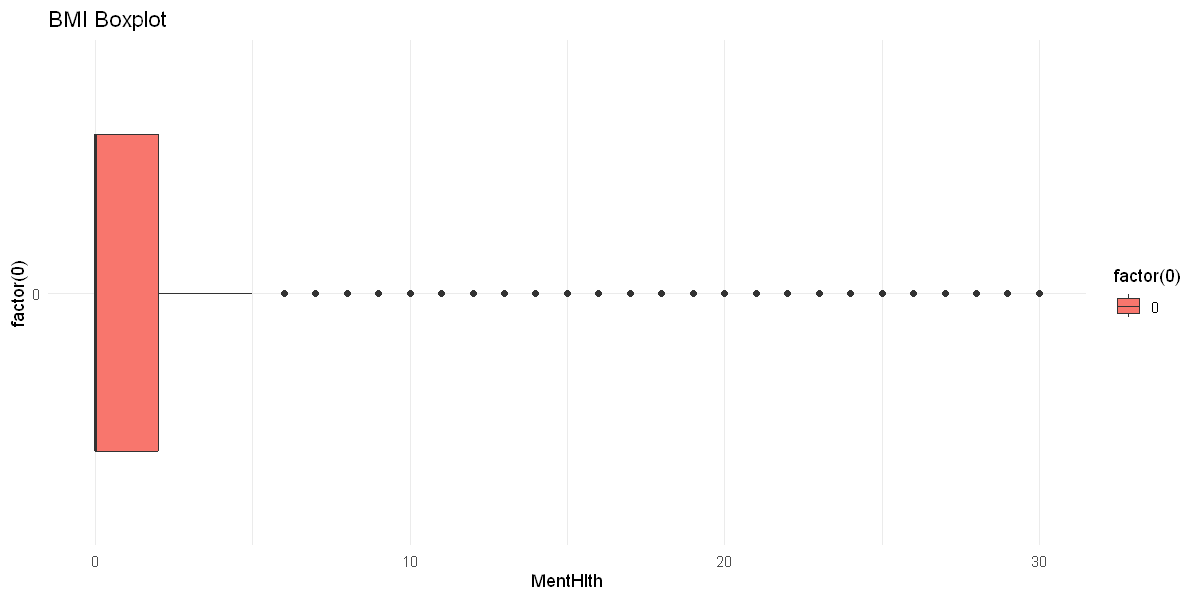

In [51]:
# Increase the width of the plot
options(repr.plot.width=10, repr.plot.height=5)

# Boxplot for BMI with horizontal axis
ggplot(df, aes(x = factor(0), y = MentHlth, fill= factor(0))) + 
    geom_boxplot() + 
    labs(title = "BMI Boxplot") + 
    theme_minimal() + 
    coord_flip()

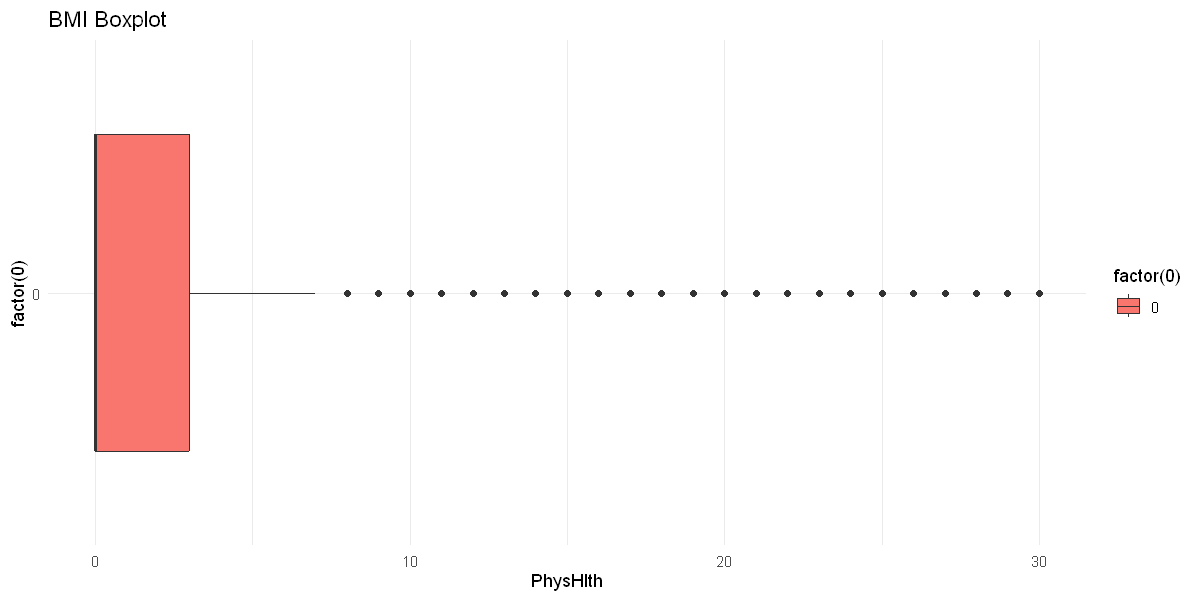

In [52]:
# Increase the width of the plot
options(repr.plot.width=10, repr.plot.height=5)

# Boxplot for BMI with horizontal axis
ggplot(df, aes(x = factor(0), y = PhysHlth, fill= factor(0))) + 
    geom_boxplot() + 
    labs(title = "BMI Boxplot") + 
    theme_minimal() + 
    coord_flip()

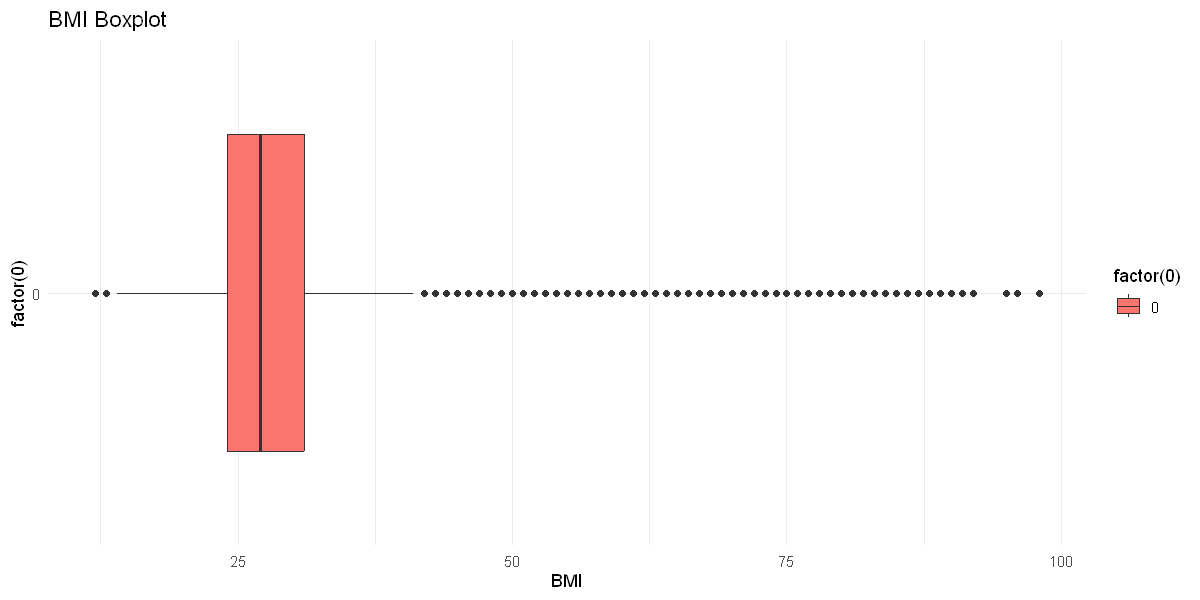

In [25]:
# Increase the width of the plot
options(repr.plot.width=10, repr.plot.height=5)

# Boxplot for BMI with horizontal axis
ggplot(df, aes(x = factor(0), y = BMI, fill= factor(0))) + 
    geom_boxplot() + 
    labs(title = "BMI Boxplot") + 
    theme_minimal() + 
    coord_flip()

In [14]:
# summary for BMI
summary(df$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   28.38   31.00   98.00 

thông qua boxplot và bảng summary thì ta thấy rõ hơn được phân bố của BMI tập trung chủ yếu vào khoảng [24,31] với trung bình là 28 độ lệch là 6, và có nhiều outlier có BMI lớn.

### Biến định tính

vẽ biểu đồ frequency cho từng biến định tính:

No id variables; using all as measure variables



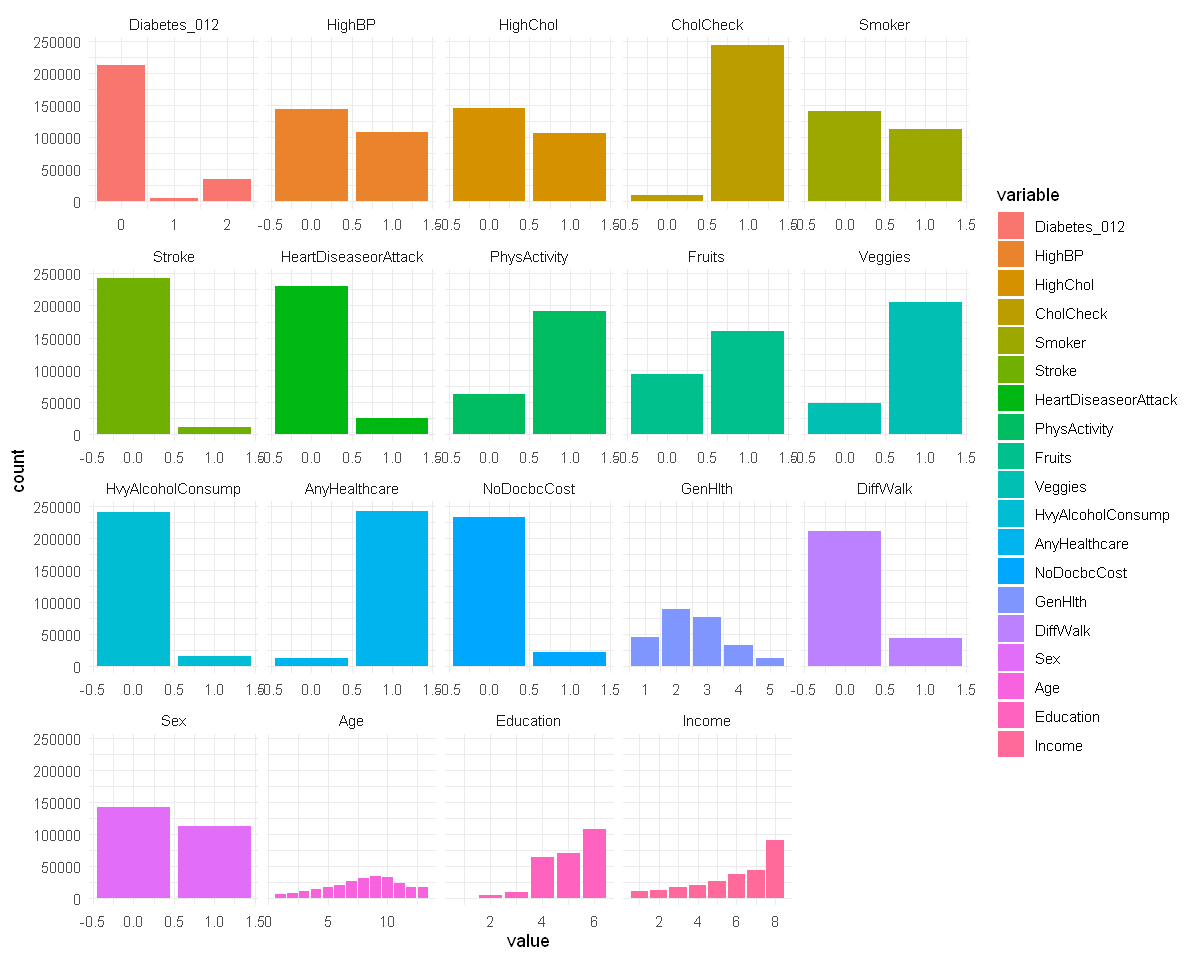

In [26]:
# Frequency plots for categorical variables
df2 <- df %>% select(-BMI, -MentHlth, -PhysHlth)

# Reshape data for plotting
df2_melt <- melt(df2)

# Increase the width of the plot
options(repr.plot.width=10, repr.plot.height=8)

# Plot frequency for each categorical variable
ggplot(df2_melt, aes(x = value, fill = variable)) + 
    geom_bar() + 
    facet_wrap(~variable, scales = 'free_x') + 
    theme_minimal()

dữ liệu cân bằng ở các biến (xấp xỉ 40-50%): HighBP, HighChol, Smoker, Sex.     
trên thực tế thì khả năng khảo sát được kết quả này là bình thường          
tỉ lệ sex cân bằng cũng cho thấy dữ liệu khảo sát đều trên cả 2 giới tính

**Dữ liệu mất cân bằng trong số lượng người bị bệnh tiểu đường, cụ thể là tỉ lệ người không bị tiểu đường nhiều >> tỉ lệ người bị tiểu đường và tiền tiểu đường**

Kiểm tra tỉ lệ cho biến dự đoán tiểu đường:

In [62]:
# tỉ lệ phần trăm của biến Diabetes_012
tm <- table(
    df$Diabetes_012,
    useNA = 'ifany'
)
prop.table(tm)


         0          1          2 
0.84241170 0.01825528 0.13933302 

Các biến khác:
- Đa số các quan sát đã kiểm tra cholesterol trong 5 năm, chỉ một số ít chưa kiểm tra.
- Số lượng quan sát từng bị đột quỵ hoặc bị nhồi máu cơ tim thấp.
- Đa số quan sát có hoạt động thể chất trong vòng 30 ngày gần đây, khoảng hơn 1/5 quan sát là không.
- Số người ăn trái cây ít nhất một ngày gần gấp đôi số người không.
- Đa số các quan sát ăn rau củ quả mỗi ngày, chiếm hơn 4/5 toàn bộ quan sát.
- Đa số các quan sát không uống nhiều rượu.
- Đa số các quan sát đã tiếp cận các dịch vụ sức khỏe.
- Một số ít quan sát (khoảng dưới 50.000) không gặp bác sĩ trong vòng 12 tháng vì không có kinh phí.
- Đa số các tình trạng sức khỏe chung của quan sát đều ở mức Very Good (nhãn 2) và Good (nhãn 3).
- Có khoảng gần 50.000 quan sát gặp tình trạng khó khăn trong đi lại.
- Trình độ học vấn quan sát được trong mẫu ở mức 4,5,6 nhiều (6 là cao nhất) => **cân nhắc gộp nhãn hiếm (1,2,3)** 
- Thu nhập ở mức 8 (cao nhất) cũng có số lượng cao nhất và giảm dần ở các mức còn lại. 

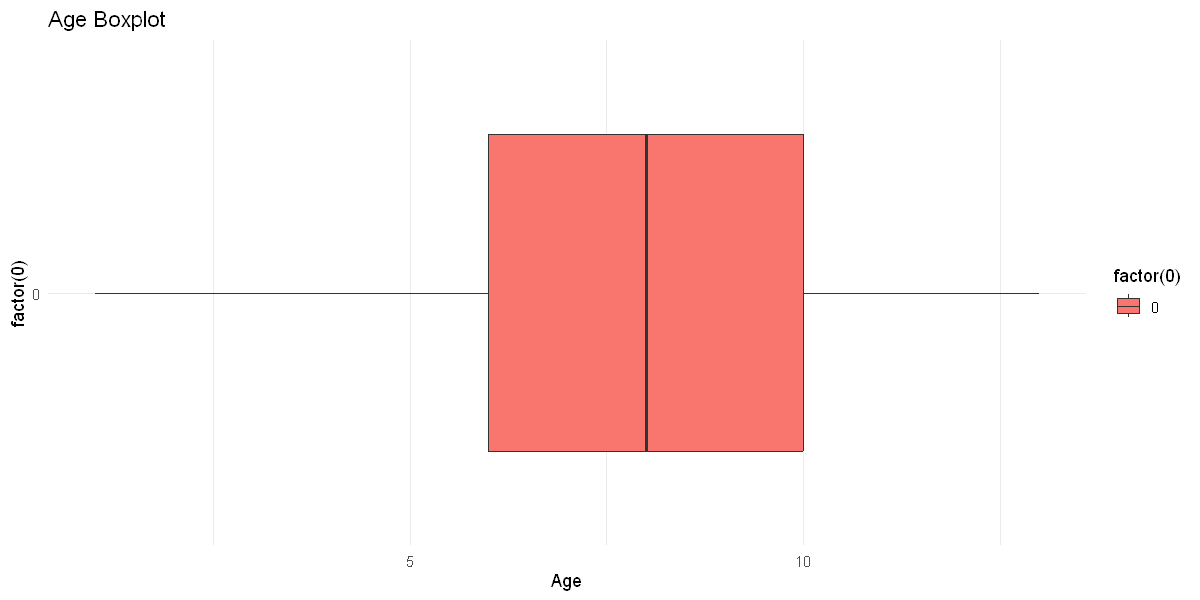

In [24]:
options(repr.plot.width=10, repr.plot.height=5)

# Boxplot for Age with color
ggplot(df, aes(x = factor(0), y = Age, fill = factor(0))) + 
  geom_boxplot() + 
  labs(title = "Age Boxplot") + 
  theme_minimal() +
  coord_flip()

phần lớn các quan sát nằm trong **nhóm** tuổi từ 6-10, với nhóm 1 có độ tuổi từ 18-24, nhóm 2 từ 25-29, nhóm 3 từ 30-34,... thì mẫu này chứa nhiều quan sát trong nhóm tuổi từ 45-69.

Overview: Đa số các quan trắc trong dataset này nằm trong độ tuổi trung niên, có thu nhập khá tốt và cũng có lối sống lành mạnh. Qua đó cũng quan sát thấy số lượng các quan trắc không bị bệnh tiểu đường cũng chiếm đa số. 

Có thể đặt 1 giả định ở đây về quan hệ của các yếu tố được khảo sát và khả năng mắc bệnh tiểu đường. 

### Correlation

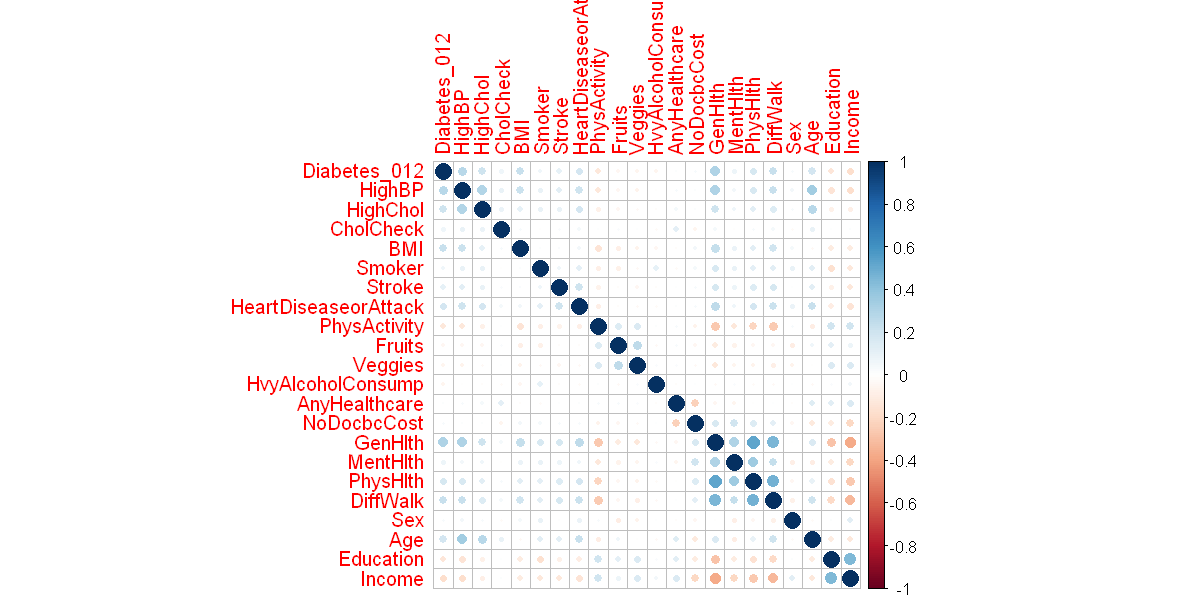

In [31]:
corr <- cor(df, use = "complete.obs")
corrplot(corr)

Một số biến trong dataset có tương quan mạnh với nhau:
- (GenHlth, PhysHlth), (PhysHlth, DiffWalk), (Education, Income), (GenHlth, DiffWalk), (MenthHlth, PhysHlth): tương quan thuận
- (GenHlth, Income), (DiffWalk, Income): tương quan nghịch

Tương quan của các biến với biến Diabetes_012

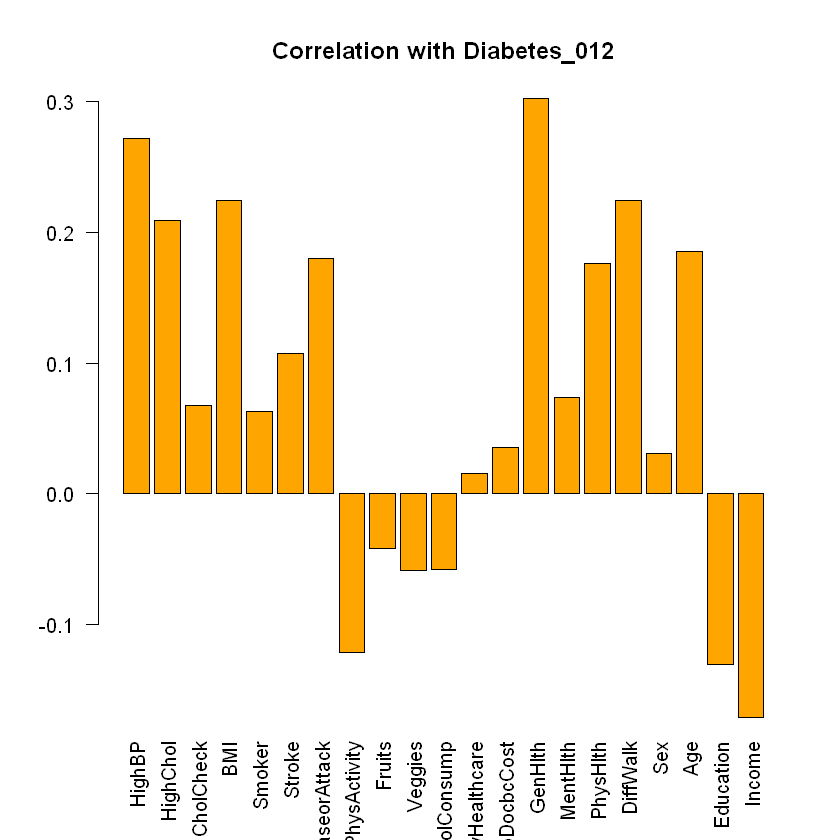

In [5]:
correlation_with_diabetes <- cor(df)[, "Diabetes_012"]
barplot(correlation_with_diabetes[-which(names(correlation_with_diabetes) == "Diabetes_012")], 
        main = "Correlation with Diabetes_012", col = "orange", las = 2)

hơn 1 nửa số biến có tương quan > 0.1 với biến phụ thuộc (Diabetes_012)

### Quan hệ của các biến định tính với biến phụ thuộc

#### Biến nhị phân

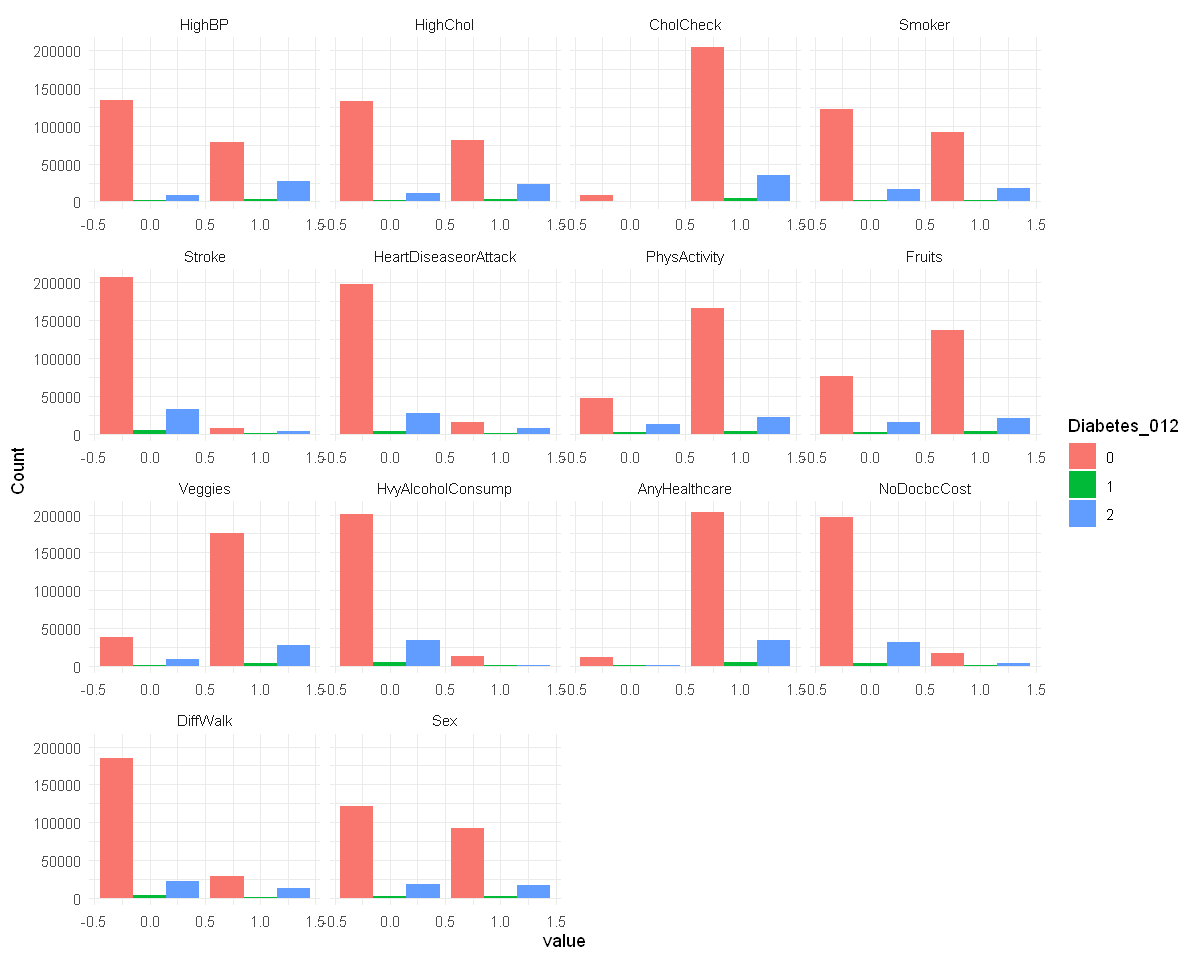

In [39]:
binary_vars <- df %>% select_if(~n_distinct(.) <= 3) %>% mutate(Diabetes_012 = df$Diabetes_012)

# Reshape data for plotting
binary_vars_melt <- melt(binary_vars, id.vars = "Diabetes_012")

ggplot(binary_vars_melt, aes(x = value, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  facet_wrap(~variable, scales = 'free_x') + 
  theme_minimal() + 
  labs(y = "Count", fill = "Diabetes_012")

In [58]:
df2 <- df %>% select(-BMI, -MentHlth, -PhysHlth)

results <- list()

for (col in colnames(df2)) {
  if (col != "Diabetes_012") {
    result <- df2 %>%
      group_by(!!sym(col)) %>%
      count(Diabetes_012) %>%
      mutate(percentage = n / sum(n)) %>%
      select(-n) %>%
      spread(Diabetes_012, percentage, fill = 0) %>%
      ungroup()
    
    result <- result %>%
      mutate(Name = paste0(col, "_", !!sym(col))) %>%
      select(Name, `0`, `1`, `2`) %>%
      rename(`No Diabetes` = `0`, `Pre Diabetes` = `1`, `Diabetes` = `2`)
    
    results[[col]] <- result
  }
}

results_df <- bind_rows(results)
results_df <- results_df %>% select(Name, `No Diabetes`, `Pre Diabetes`, `Diabetes`)
head(results_df)

Name,No Diabetes,Pre Diabetes,Diabetes
<chr>,<dbl>,<dbl>,<dbl>
HighBP_0,0.9277879,0.01186046,0.06035167
HighBP_1,0.7287763,0.02676676,0.24445690
HighChol_0,0.9081656,0.01202007,0.07981436
HighChol_1,0.7531299,0.02672157,0.22014853
CholCheck_0,0.9680042,0.00654699,0.02544879
CholCheck_1,0.8375415,0.01870931,0.14374923


In [60]:
for (i in seq(1, nrow(results_df), by = 2)) {
  if (abs(results_df[i, 'No Diabetes'] - results_df[i + 1, 'No Diabetes']) > 0.1) {
    print(substr(results_df[i, 'Name'], 1, nchar(as.character(results_df[i, 'Name'])) - 2))
  }
}

[1] "HighBP"
[1] "HighChol"
[1] "CholCheck"
[1] "Stroke"
[1] "HeartDiseaseorAttack"
[1] "PhysActivity"
[1] "GenHlth"
[1] "GenHlth"
[1] "DiffWalk"
[1] "Sex"


=> các biến trên có thể có ảnh hưởng đến khả năng mắc bệnh tiểu đường (cần kiểm định)

#### Các biến khác
 GenHlth, Age, Education, Income

In [57]:
df %>% group_by(GenHlth) %>%
  count(Diabetes_012) %>%
  mutate(percentage = n / sum(n)) %>%
  select(-n) %>%
  spread(Diabetes_012, percentage, fill = 0)

GenHlth,0,1,2
<dbl>,<dbl>,<dbl>,<dbl>
1,0.9679242,0.006909645,0.02516612
2,0.9147434,0.013627587,0.07162902
3,0.7992624,0.022843244,0.17789440
4,0.6574279,0.032467532,0.31010453
5,0.5920040,0.029053886,0.37894214


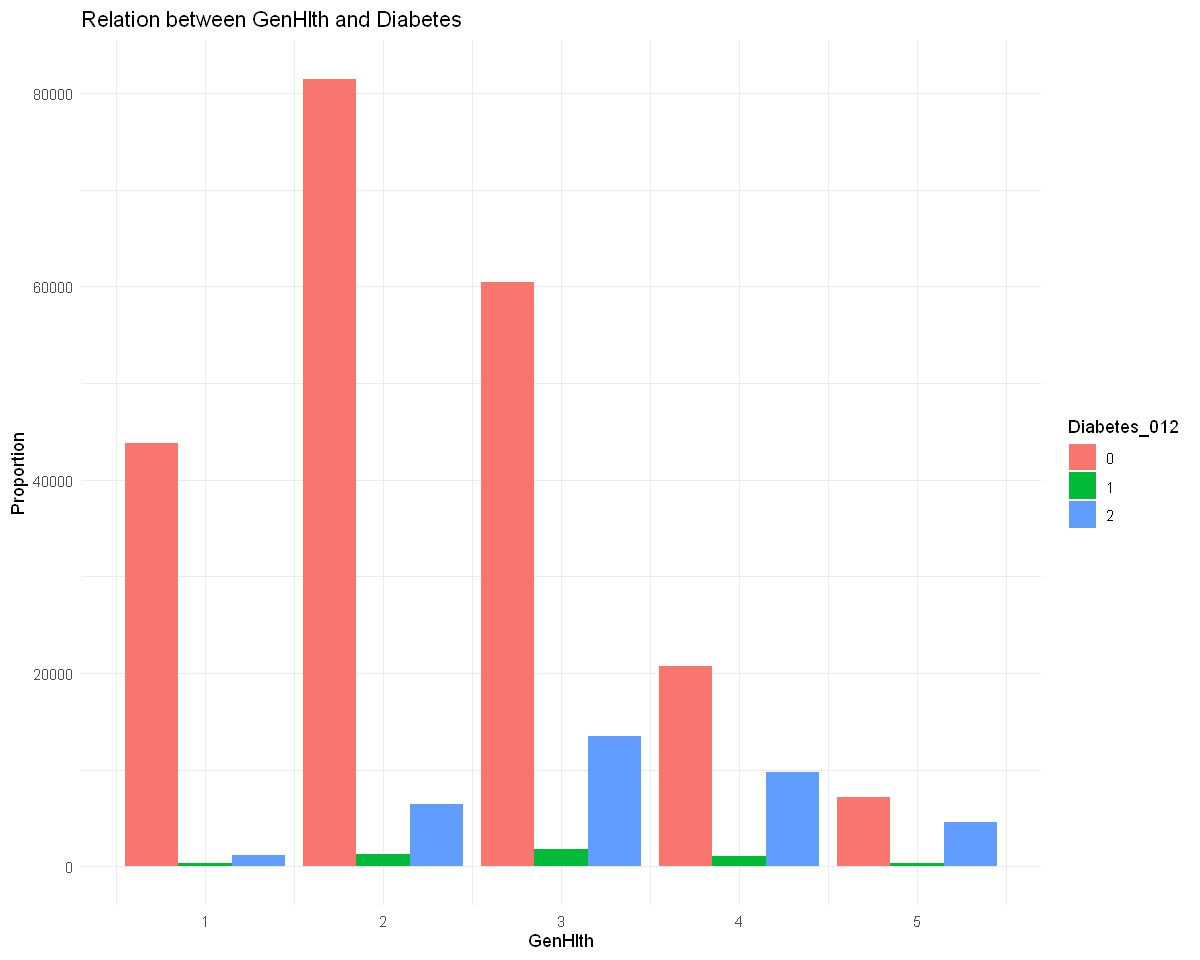

In [42]:
categorical_vars <- df %>% select(Diabetes_012, GenHlth, Age, Education, Income)

ggplot(categorical_vars, aes(x = GenHlth, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  theme_minimal() + 
  labs(y = "Proportion", fill = "Diabetes_012", title = "Relation between GenHlth and Diabetes")


Các trường hợp có sức khỏe Excellent (nhãn 1) và Very Good (nhãn 2) thì ít khả năng mắc bệnh tiểu đường. Ngược lại thì với nhãn 4 và 5 thì xác suất mắc bệnh tiểu đường khá cao. 

In [56]:
df %>% group_by(Age) %>%
  count(Diabetes_012) %>%
  mutate(percentage = n / sum(n)) %>%
  select(-n) %>%
  spread(Diabetes_012, percentage, fill = 0)

Age,0,1,2
<dbl>,<dbl>,<dbl>,<dbl>
1,0.9826316,0.003684211,0.01368421
2,0.9744670,0.007107133,0.01842590
3,0.9652971,0.006473074,0.02822979
4,0.9444404,0.010272734,0.04528684
5,0.9248623,0.010088507,0.06504920
6,0.8963621,0.015742469,0.08789545
7,0.8667629,0.015885080,0.11735198
8,0.8438960,0.017838609,0.13826544
9,0.8064312,0.021116592,0.17245217


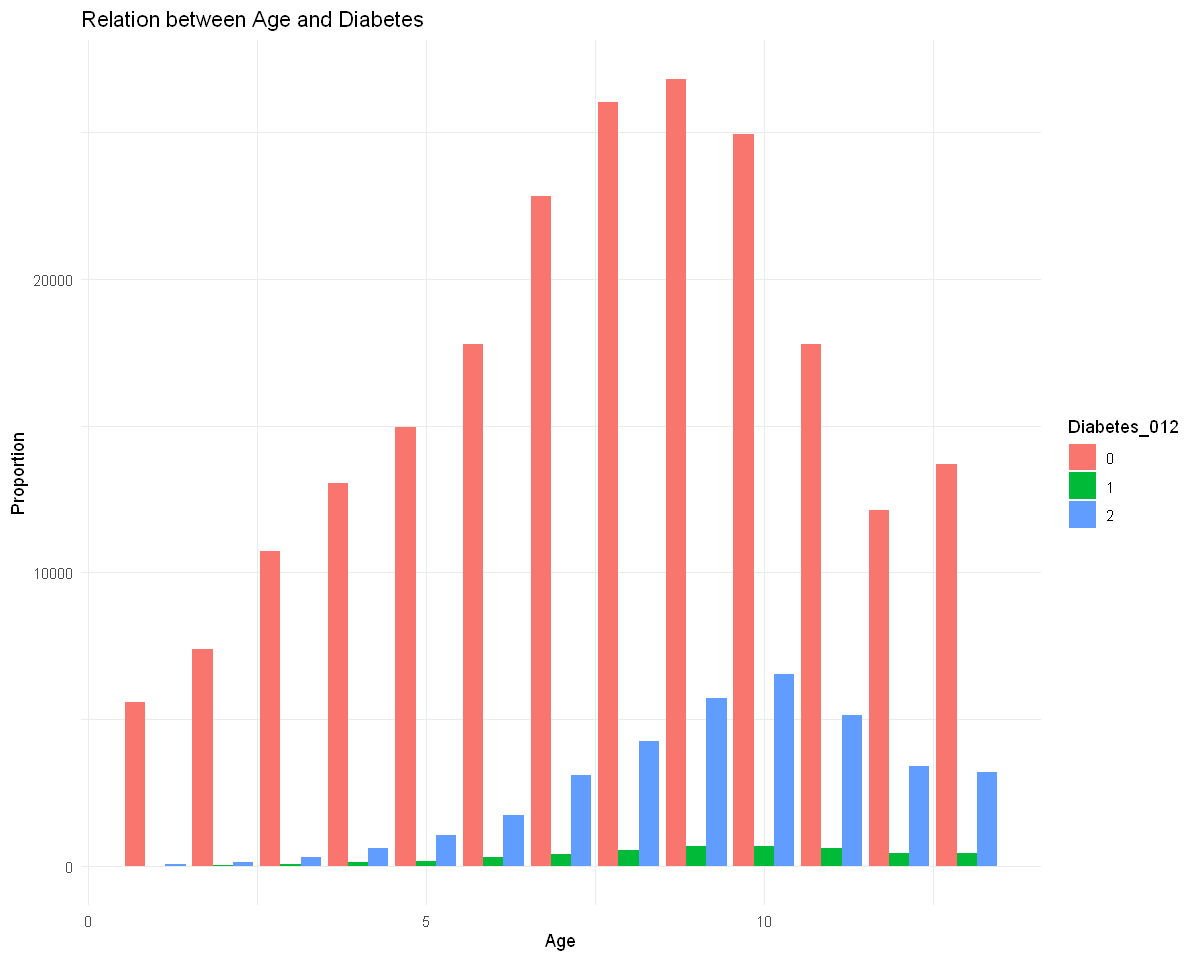

In [43]:
ggplot(categorical_vars, aes(x = Age, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  theme_minimal() + 
  labs(y = "Proportion", fill = "Diabetes_012", title = "Relation between Age and Diabetes")


Dữ liệu quan sát được đa số quan trắc nằm trong nhóm tuổi từ 6-10. Khả năng mắc bệnh tiểu đường trong nhóm này tăng dần theo độ tuổi. Khả năng mắc bệnh ở nhóm 11 và 12 không tăng và giảm ở nhóm 13. 

In [55]:
df %>% group_by(Education) %>%
  count(Diabetes_012) %>%
  mutate(percentage = n / sum(n)) %>%
  select(-n) %>%
  spread(Diabetes_012, percentage, fill = 0)

Education,0,1,2
<dbl>,<dbl>,<dbl>,<dbl>
1,0.7183908,0.01149425,0.27011494
2,0.6675736,0.03982191,0.29260450
3,0.7246254,0.03312935,0.24224520
4,0.8021355,0.02151394,0.17635060
5,0.8328279,0.01906737,0.14810471
6,0.8893920,0.01370603,0.09690193


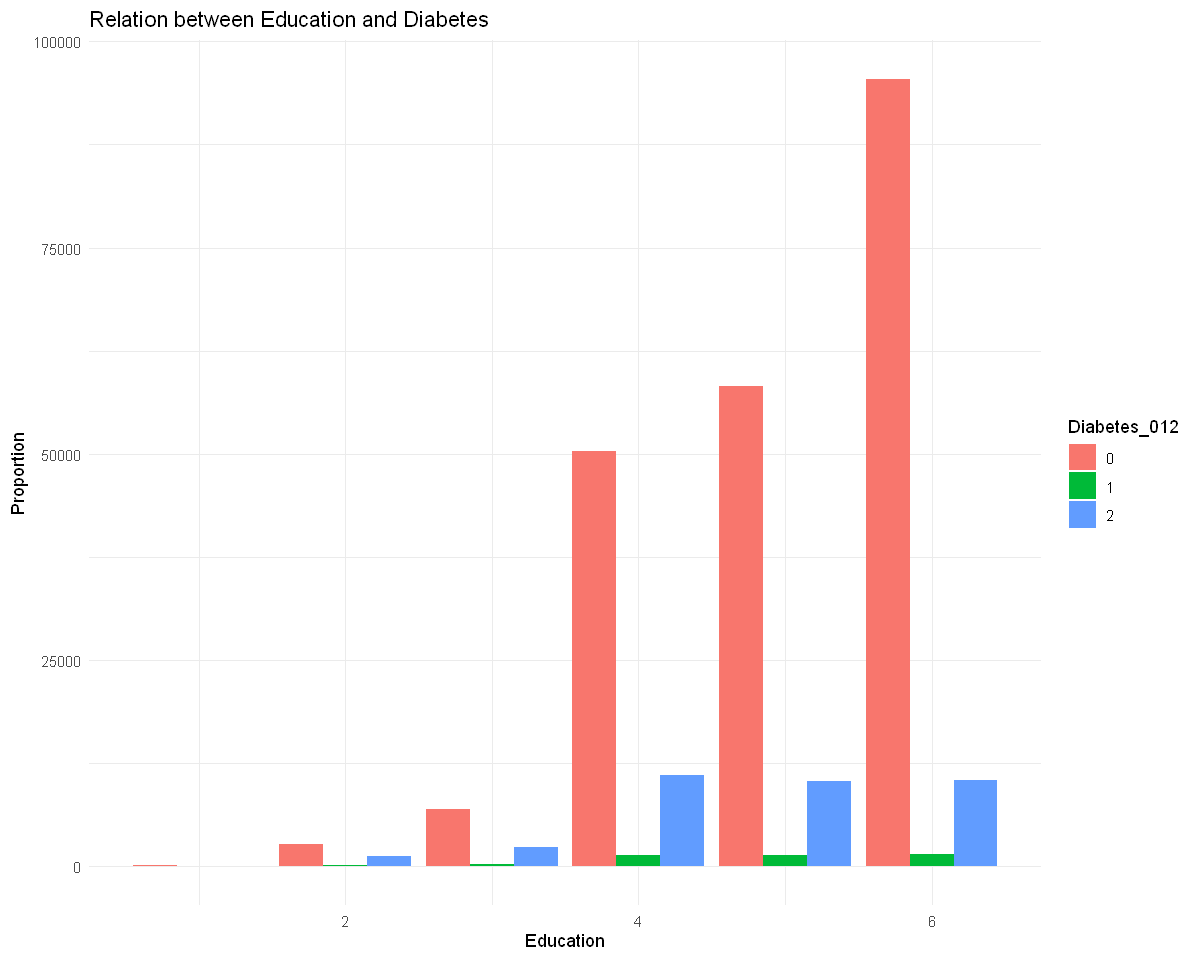

In [44]:
ggplot(categorical_vars, aes(x = Education, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  theme_minimal() + 
  labs(y = "Proportion", fill = "Diabetes_012", title = "Relation between Education and Diabetes")


Khả năng mắc bệnh tiểu đường có xu hướng giảm dần từ nhóm có trình độ học vấn thấp đến trình độ học vấn cao. 

(Số lượng người được khảo sát có trình độ học vấn từ 1->3 ở đây đang rất ít só với các nhóm còn lại nên có thể chưa phản ánh chính xác)

In [ ]:
df %>% group_by(Income) %>%
  count(Diabetes_012) %>%
  mutate(percentage = n / sum(n)) %>%
  select(-n) %>%
  spread(Diabetes_012, percentage, fill = 0)

Income,0,1,2
<dbl>,<dbl>,<dbl>,<dbl>
1,0.7251045,0.03200489,0.24289063
2,0.7078842,0.03021302,0.26190274
3,0.7505940,0.02632237,0.22308366
4,0.7758629,0.02279613,0.20134095
5,0.8033072,0.02267898,0.17401383
6,0.8344118,0.02051001,0.14507815
7,0.8611722,0.01700641,0.12182142
8,0.9092106,0.01118548,0.07960392


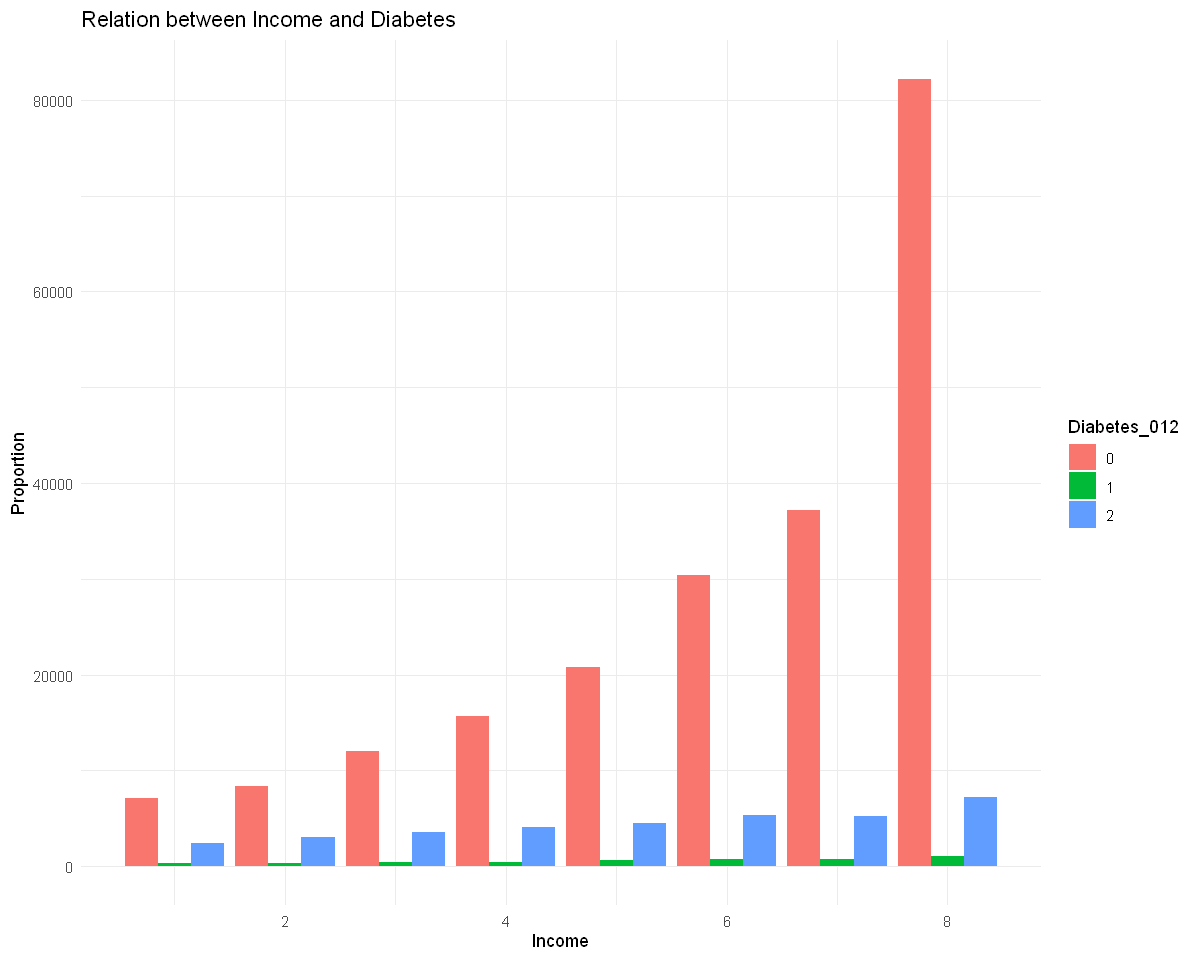

In [45]:
ggplot(categorical_vars, aes(x = Income, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  theme_minimal() + 
  labs(y = "Proportion", fill = "Diabetes_012", title = "Relation between Income and Diabetes")

Khả năng bị bệnh tiểu đường cũng có xu hướng giảm dần từ nhóm có thu nhập thấp đến nhóm có thu nhập cao.

Do đã quan sát thấy Education và Income có tương quan thuận, nên xu hướng cho 2 biến này lên biến phụ thuộc giống nhau. 

### Quan hệ của các biến định lượng với biến phụ thuộc

BMI, MentHlth, PhysHlth,

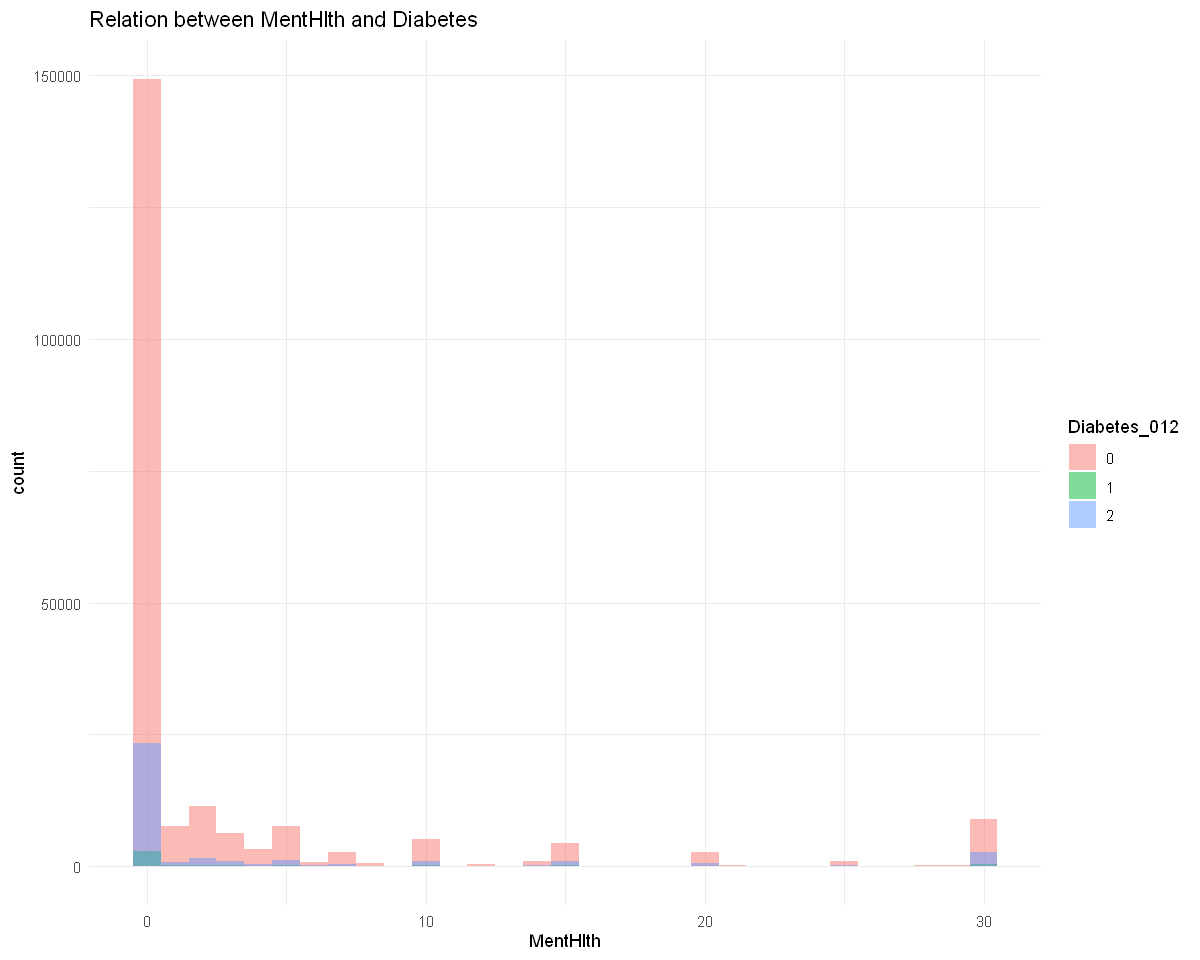

In [46]:
ggplot(df, aes(x = MentHlth, fill = factor(Diabetes_012))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 31) + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between MentHlth and Diabetes")


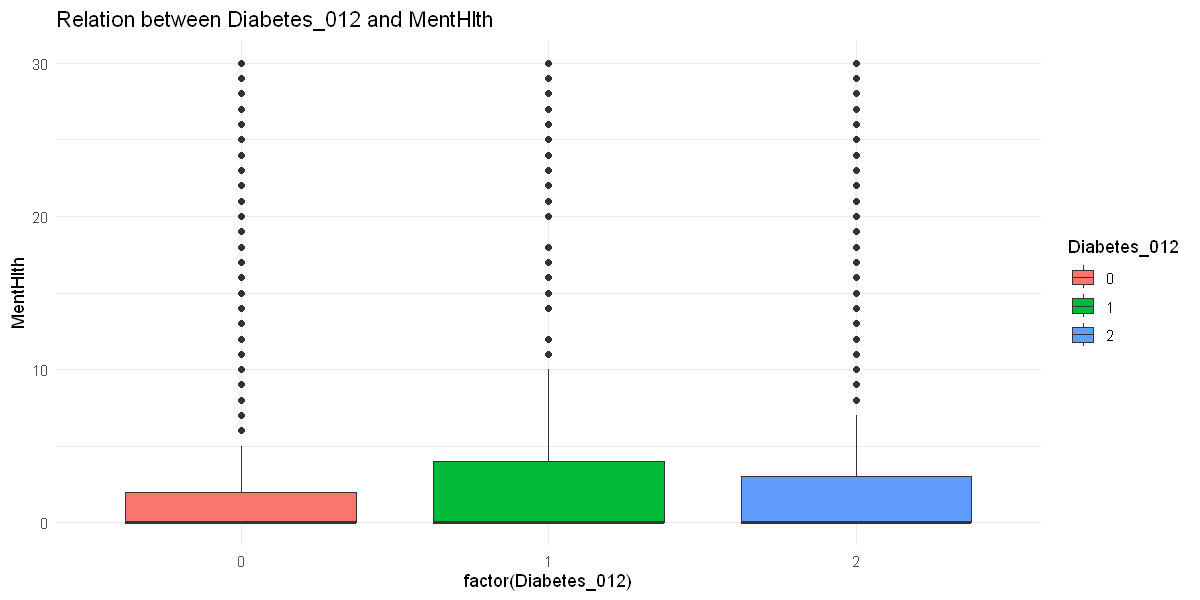

In [71]:
ggplot(df, aes(x = factor(Diabetes_012), y = MentHlth, fill = factor(Diabetes_012))) + 
  geom_boxplot() + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between Diabetes_012 and MentHlth")

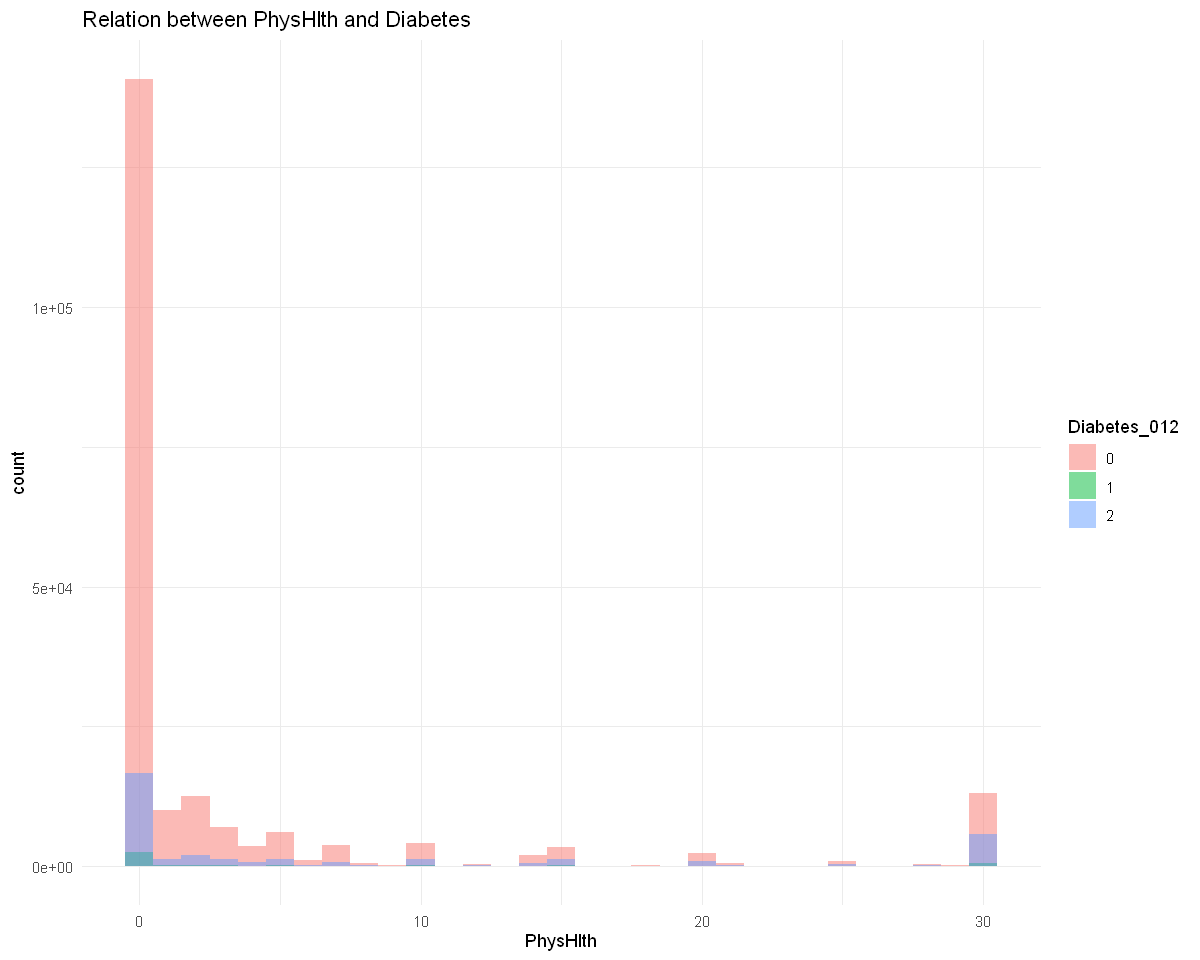

In [47]:
ggplot(df, aes(x = PhysHlth, fill = factor(Diabetes_012))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 31) + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between PhysHlth and Diabetes")


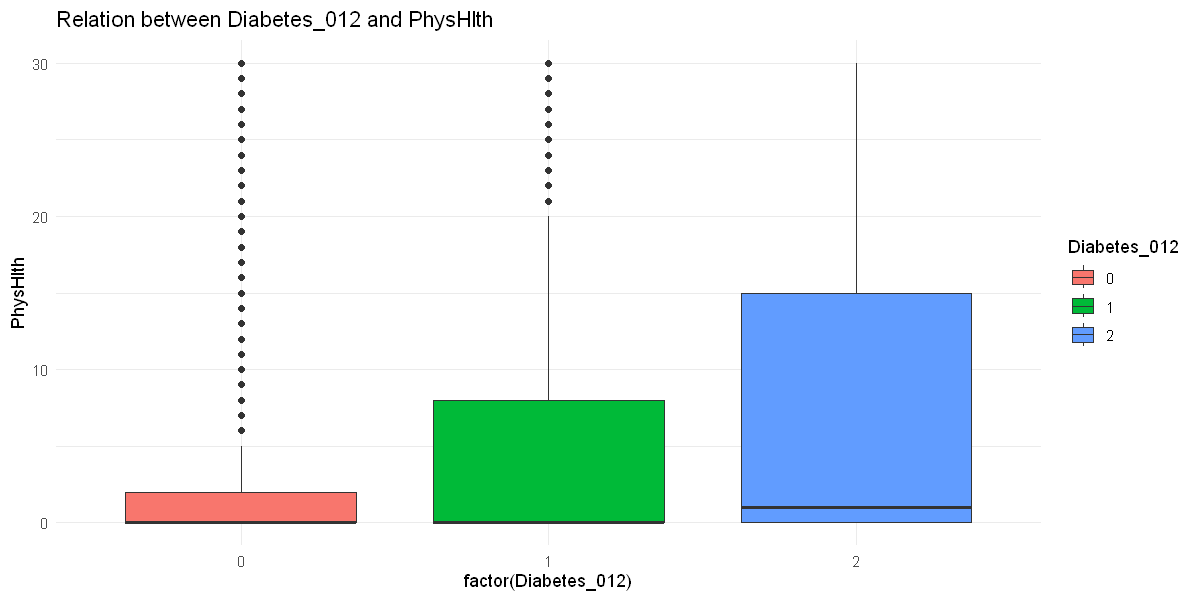

In [70]:
ggplot(df, aes(x = factor(Diabetes_012), y = PhysHlth, fill = factor(Diabetes_012))) + 
  geom_boxplot() + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between Diabetes_012 and PhysHlth")

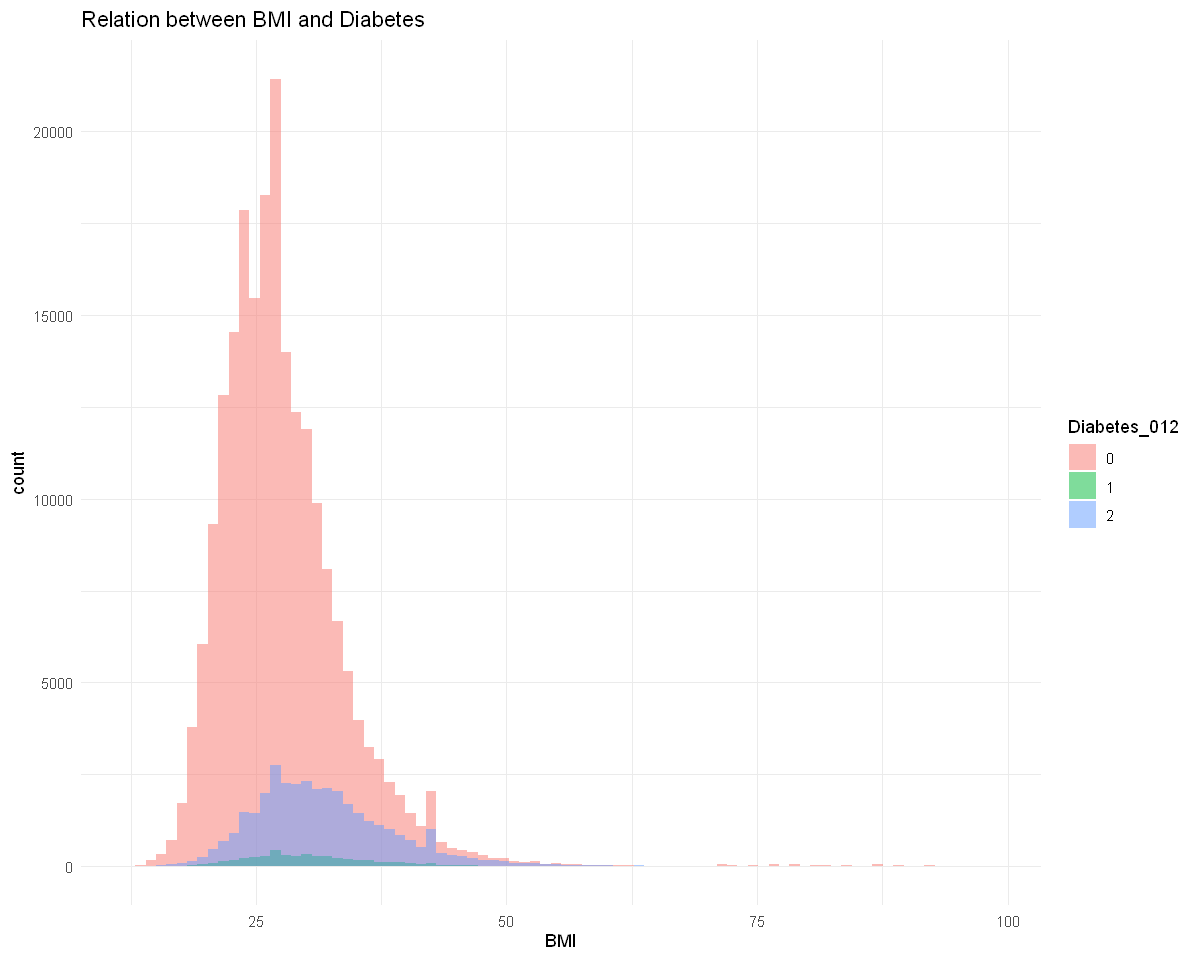

In [48]:
ggplot(df, aes(x = BMI, fill = factor(Diabetes_012))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 84) + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between BMI and Diabetes")

đa số người bị tiểu đường hoặc tiền tiểu đường nằm trong khoảng BMI từ [20,50] 

có thể chia nhãn lại cho dữ liệu

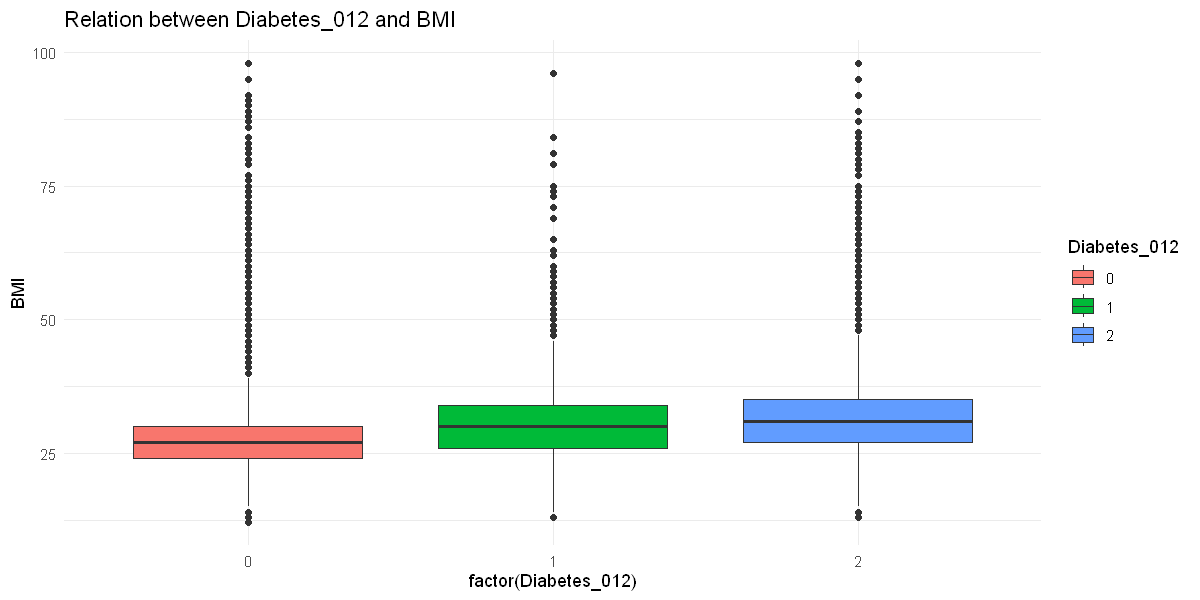

In [67]:
ggplot(df, aes(x = factor(Diabetes_012), y = BMI, fill = factor(Diabetes_012))) + 
  geom_boxplot() + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between Diabetes_012 and BMI")

### Quan hệ tương tác của các biến với biến phụ thuộc

`geom_smooth()` using formula = 'y ~ x'


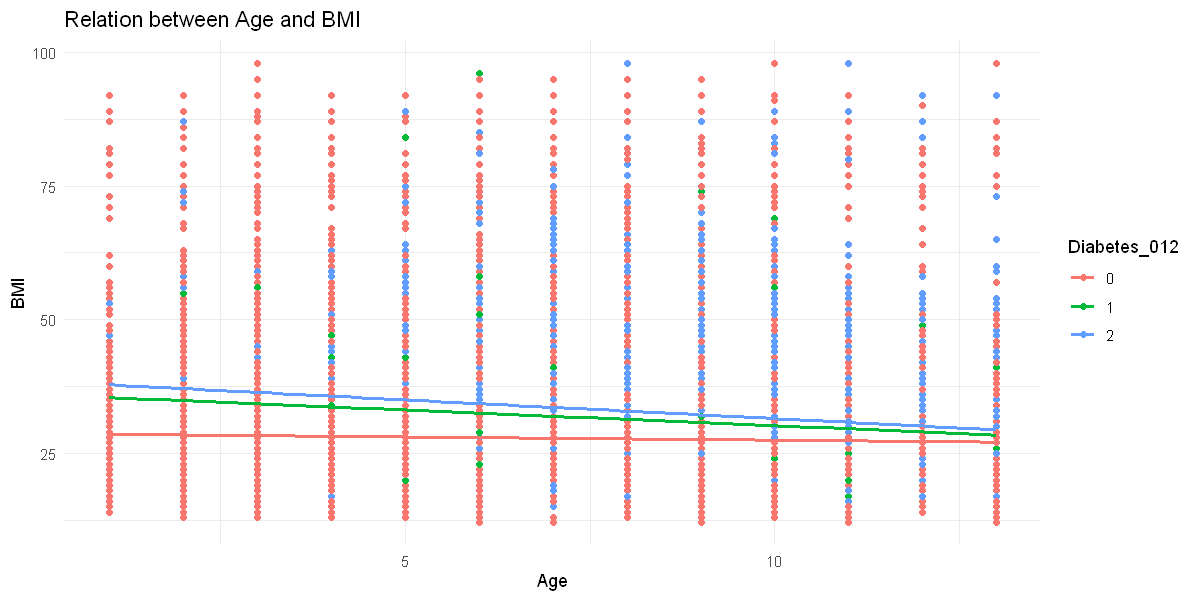

In [ ]:
# vẽ biểu đồ scatter plot giữa Age và BMI với màu sắc phân biệt giữa các nhóm Diabetes_012 
# có thêm đường xu hướng cho mỗi nhóm
ggplot(df, aes(x = Age, y = BMI, color = factor(Diabetes_012))) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE) + 
  theme_minimal() + 
  labs(color = "Diabetes_012", title = "Relation between Age and BMI")

#### Summary

1 số biến có tương quan với nhau => có thể dẫn đến đa cộng tuyến => có thể ảnh hưởng đến logistic regression

Biến nhị phân cần kiểm định có thật sự ảnh hưởng đến nguy cơ mắc bệnh tiểu đường hay không: HighBP, HighChol, CholCheck, Stroke, HeartDiseaseorAttack, PhysActivity, DiffWalk, Sex      

Các biến có thể không ảnh hưởng lớn đến dự đoán:  Smoker, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, Age, Education, Income. 

Quan sát các tương tác của các biến lên biến phụ thuộc để lựa chọn biến cho mô hình. 

**Preprocessing:**       
Dữ liệu về số lượng người mắc bệnh tiểu đường và không mắc bệnh không cân bằng => xử lí imbalanced data.         
Các biến định lượng có chứa outliers => có thể loại bỏ hoặc dùng log transform/ robust scaling hoặc: 
- có thể chia nhãn dữ liệu lại: Education, BMI.
- GenHlth, MentHlth và PhysHlth có tương quan với nhau nên trong model có thể chỉ dùng GenHlth. 

**Mục tiêu:** Dự đoán/Phân loại 1 người bị bệnh tiểu đường, tiền tiểu đường hoặc không bị bệnh tiểu đường, biến phụ thuộc: Diabetes_012